In [3]:
# 导入库
import pandas as pd
from sklearn.model_selection import train_test_split  # 数据分区库
import xgboost as xgb
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, \
    precision_score, recall_score, roc_curve  # 导入指标库
from imblearn.over_sampling import SMOTE  # 过抽样处理库SMOTE
import matplotlib.pyplot as plt

#### 读取数据

In [32]:
raw_data = pd.read_csv('classification.csv',delimiter=',')

In [6]:
raw_data.shape

(1000, 42)

In [33]:
X,y = raw_data.iloc[:,:-1],raw_data.iloc[:,-1]  # 拆分特征和目标

In [35]:
(y==1).sum()  # 流失用户为274个   726个未流失用户   样本不均衡的 如果不处理的话 会影响模型的效果

274

In [34]:
X = X.fillna(X.mean())

In [11]:
# 样本均衡处理
# model_smote = SMOTE()
# X,y = model_smote.fit_sample(X,y)

In [14]:
(y==0).sum()

726

#### 数据集拆分

In [36]:
X = pd.DataFrame(X,columns=raw_data.columns[:-1])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 0)

In [37]:
param_dist = {'objective': 'binary:logistic', 'n_estimators': 10,
              'subsample': 0.8, 'max_depth': 10, 'n_jobs': -1}
model_xgb = xgb.XGBClassifier(**param_dist)
model_xgb.fit(X_train,y_train)
pre_y = model_xgb.predict(X_test)

#### 模型评估 构建混淆矩阵

In [38]:
tn,fp,fn,tp = confusion_matrix(y_test,pre_y).ravel()

In [18]:
tn,fp,fn,tp

(180, 42, 37, 177)

In [20]:
pd.DataFrame([[tp,fn],[fp,tn]],columns=['prediction-0','prediction-1'],index=['actual-0','actual-1'])

,prediction-0,prediction-1
actual-0,177,37
actual-1,42,180


In [39]:
y_score = model_xgb.predict_proba(X_test)

In [40]:
fpr,tpr,_ = roc_curve(y_test,y_score[:,1])

In [41]:
auc_s = auc(fpr,tpr)

In [42]:
auc_s

0.7473544973544972

In [43]:
scores = [round(i(y_test,pre_y),3) for i in (accuracy_score,precision_score,recall_score,f1_score)]

In [44]:
scores # 计算各种指标

[0.757, 0.608, 0.369, 0.459]

In [45]:
scores.insert(0,auc_s)

In [46]:
pd.DataFrame([scores],columns=['auc', 'accuracy', 'precision', 'recall', 'f1'])

,auc,accuracy,precision,recall,f1
0,0.747354,0.757,0.608,0.369,0.459


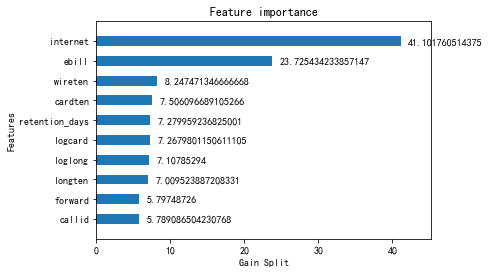

In [30]:
xgb.plot_importance(model_xgb,height=0.5,importance_type='gain',max_num_features=10,xlabel='Gain Split',grid=False) 

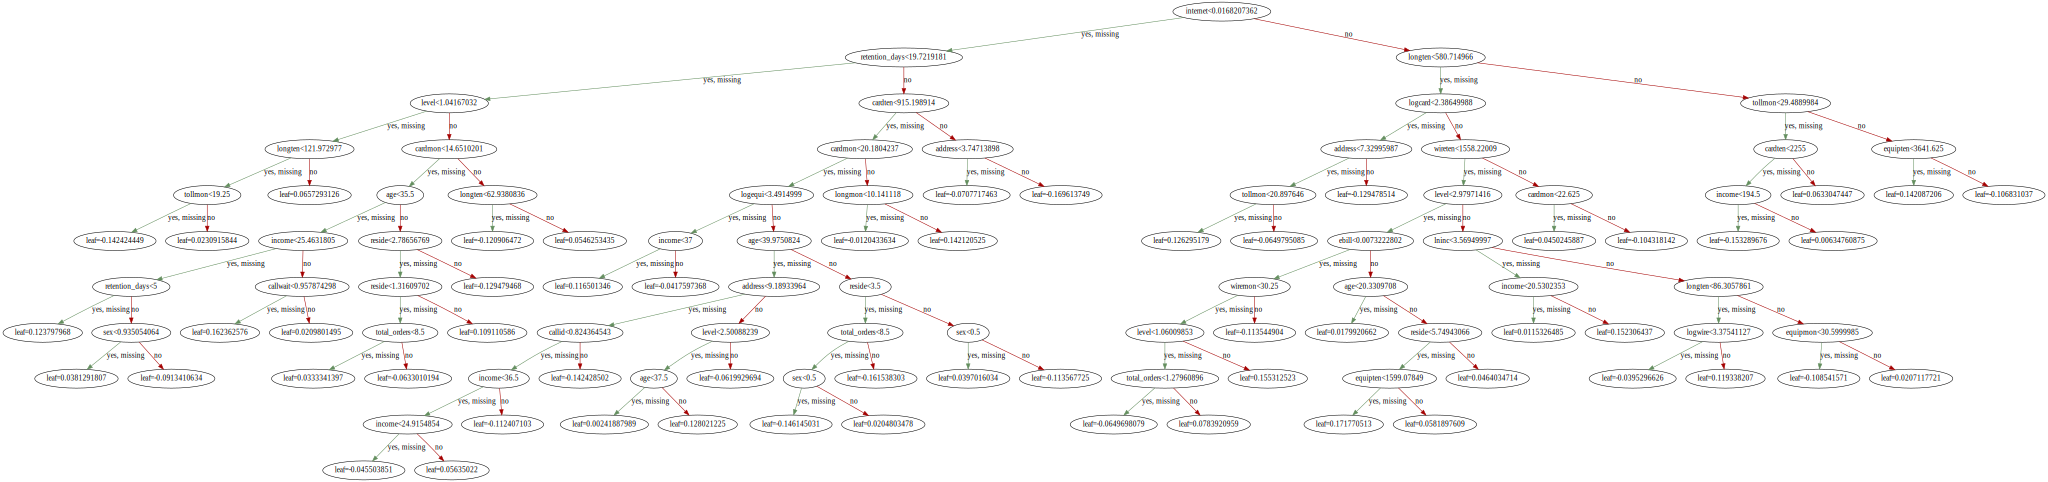

In [31]:
xgb.to_graphviz(model_xgb, num_trees=1, yes_color='#638e5e', no_color='#a40000') 